# i2b2 export analysis (v1)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# load data

In [2]:
#declare files
casefile = "exports/v1/i2b2-export_patient-central-line-infections-sample_20230911-013643.csv"
controlfile = "exports/v1/i2b2-export_patient-central-line-sample_20230911-015152.csv"
# load data
case = pd.read_csv(casefile)
control = pd.read_csv(controlfile)

# visualize data

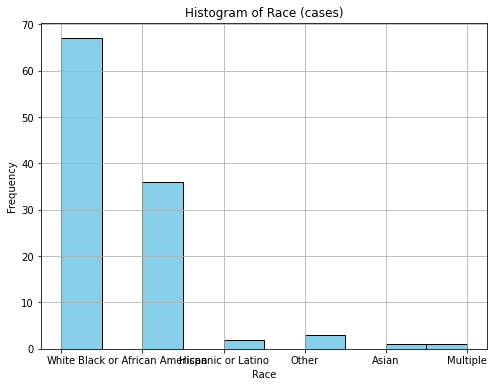

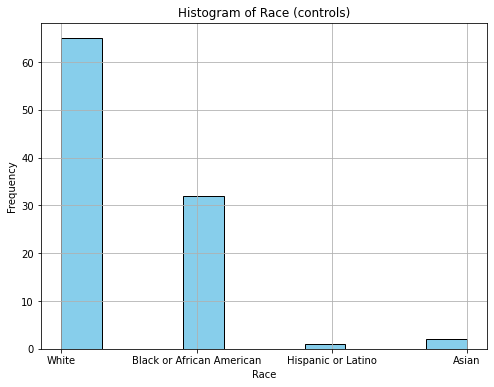

In [3]:
# histograms
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(case["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (cases)')
plt.grid(True)
plt.show()

# controls 
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
plt.hist(control["Race"], color='skyblue', edgecolor='black')
plt.xlabel("Race")
plt.ylabel('Frequency')
plt.title(f'Histogram of Race (controls)')
plt.grid(True)
plt.show()

In [7]:
whitecase = case["Race"].value_counts()['White']
blackcase = case["Race"].value_counts()['Black or African American']
whitecontrol = control["Race"].value_counts()['White']
blackcontrol = control["Race"].value_counts()['Black or African American']

In [8]:
from scipy.stats import chi2_contingency
 
# defining the table
data = [[whitecase, blackcase], [whitecontrol, blackcontrol]]

#            white        black
# Case     casewhite    caseblack
#control   whitecontrol blackcontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.8860026558011562
Independent (H0 holds true)


In [9]:
mancase = case["Sex"].value_counts()['MALE']
womancase = case["Sex"].value_counts()['FEMALE']
mancontrol = control["Sex"].value_counts()['MALE']
womancontrol = control["Sex"].value_counts()['FEMALE']

In [10]:
# defining the table
data = [[mancase, womancase], [mancontrol, womancontrol]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9004970245874092
Independent (H0 holds true)


In [11]:
case

,,Patient ID,Sex,Age in Years,Birth Year,Vital Status,Language,Race,Regligion,Income,Locality,Marital Status,Infection due to central venous catheter (ICD10:T80.21),Unnamed: 13
0,1,1511102,MALE,-1,1934,Deceased,English,White,Baptist,undefined,"AL,",Married,ICD9:999.31 = PICC LINE INFECTION (DIAGNOSIS:B...,NaN
1,2,1517611,FEMALE,-1,1954,Deceased,English,Black or African American,Baptist,undefined,"AL,",Married,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
2,3,1802996,MALE,29,1994,Alive,English,White,Christian,undefined,"AL,",Single,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
3,4,1842354,FEMALE,-1,1947,Deceased,English,White,Baptist,undefined,"MS,",Married,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
4,5,1924557,FEMALE,52,1971,Alive,English,White,Christian,undefined,"AL,",Married,ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION ...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,296283,MALE,-1,1959,Deceased,English,Multiple,None,undefined,"AL,",Single,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN
106,107,636966,FEMALE,-1,1956,Deceased,English,Black or African American,Christian,undefined,"AL,",Married,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN
107,108,1287337,FEMALE,-1,1951,Deceased,English,White,Christian,undefined,"AL,",Married,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN
108,109,1380884,MALE,43,1980,Alive,English,White,Baptist,undefined,"AL,",Single,ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CEN...,NaN


In [13]:
print(case["Marital Status"].value_counts()['Single'], ' ', case["Marital Status"].value_counts()['Married'], ' ', case["Marital Status"].value_counts()['Separated'], ' ', case["Marital Status"].value_counts()['Divorced'], ' ', case["Marital Status"].value_counts()['Unknown'])

33   62   2   8   1


In [15]:
print(control["Marital Status"].value_counts()['Single'], ' ', control["Marital Status"].value_counts()['Married'], ' ', control["Marital Status"].value_counts()['Separated'], ' ', control["Marital Status"].value_counts()['Divorced'])

46   35   1   12


In [18]:
# defining the table
data = [[case["Marital Status"].value_counts()['Single'], case["Marital Status"].value_counts()['Married'], case["Marital Status"].value_counts()['Separated'] + case["Marital Status"].value_counts()['Divorced']], [control["Marital Status"].value_counts()['Single'], control["Marital Status"].value_counts()['Married'], control["Marital Status"].value_counts()['Separated'] + control["Marital Status"].value_counts()['Divorced']]]

#            man          woman
# Case     mancase      womancase
#control   mancontrol   womancontrol

stat, p, dof, expected = chi2_contingency(data)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.008796096538333052
Dependent (reject H0)


# ML ATTEMPTS

In [17]:
import numpy as np
import csv
from sklearn.utils import Bunch

def load_my_fancy_dataset(str file):
    with open(str, r) as csv_file:
        data_reader = csv.reader(csv_file)
        feature_names = next(data_reader)[:-1]
        data = []
        target = []
        for row in data_reader:
            features = row[:-1]
            label = row[-1]
            data.append([d for d in features])
            target.append(label)
        
        data = np.array(data)
        target = np.array(target)
    return Bunch(data=data, target=target, feature_names=feature_names)

In [18]:
ds = load_my_fancy_dataset()

In [19]:
ds

{'data': array([['1', '1511102', 'MALE', ..., 'AL, ', 'Married',
         'ICD9:999.31 = PICC LINE INFECTION (DIAGNOSIS:BILLING DIAGNOSIS)'],
        ['2', '1517611', 'FEMALE', ..., 'AL, ', 'Married',
         'ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL)'],
        ['3', '1802996', 'MALE', ..., 'AL, ', 'Single',
         'ICD9:999.31 = OTHER AND UNSPECIFIED INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL)'],
        ...,
        ['108', '1287337', 'FEMALE', ..., 'AL, ', 'Married',
         'ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL), ICD9:999.33 = LOCAL INFECTION DUE TO CENTRAL VENOUS CATHETER (MSO BILLED CHARGES)'],
        ['109', '1380884', 'MALE', ..., 'AL, ', 'Single',
         'ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CENTRAL VENOUS CATHETER (DIAGNOSIS:FINAL)'],
        ['110', '1556658', 'FEMALE', ..., 'FL, ', 'Married',
         'ICD9:999.32 = BLOODSTREAM INFECTION DUE TO CE